In [3]:
import pandas as pd
pf = pd.read_csv('iris.csv')

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
x = pf.iloc[:,0:4].values
print(x)
y = pf.iloc[:,4].values
print(y)


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [48]:
pf.shape

(150, 5)

In [43]:
pf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [39]:
pf.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [44]:
pf.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [45]:
pf.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [17]:
### LABEL ENCODER ####
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

le = LabelEncoder()
y_new = le.fit_transform(y)
print(y_new)

x_train,x_test,y_train,y_test = train_test_split(x,y_new,test_size=.25)
print(y_test)

print('___X TEST____')
print(x_test)
print('__X TRAIN____')
print(y_train)
print('___Y TEST____')
print(x_train)
print('__y TRAIN____')
print(y_train)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[1 1 2 1 0 0 2 2 1 1 2 0 0 1 0 0 0 1 1 0 1 2 0 1 0 0 0 2 2 2 2 0 1 0 1 2 2
 2]
___X TEST____
[[6.5 2.8 4.6 1.5]
 [5.5 2.6 4.4 1.2]
 [5.6 2.8 4.9 2. ]
 [6.4 3.2 4.5 1.5]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.9 0.4]
 [6.3 2.5 5.  1.9]
 [6.4 2.8 5.6 2.1]
 [7.  3.2 4.7 1.4]
 [5.  2.3 3.3 1. ]
 [6.9 3.1 5.4 2.1]
 [5.3 3.7 1.5 0.2]
 [5.1 3.4 1.5 0.2]
 [6.7 3.1 4.4 1.4]
 [5.1 3.7 1.5 0.4]
 [4.8 3.1 1.6 0.2]
 [4.9 3.1 1.5 0.1]
 [4.9 2.4 3.3 1. ]
 [6.8 2.8 4.8 1.4]
 [5.  3.4 1.6 0.4]
 [6.1 2.8 4.7 1.2]
 [6.7 2.5 5.8 1.8]
 [4.8 3.  1.4 0.3]
 [6.6 3.  4.4 1.4]
 [5.8 4.  1.2 0.2]
 [4.6 3.2 1.4 0.2]
 [4.5 2.3 1.3 0.3]
 [5.7 2.5 5.  2. ]
 [6.1 2.6 5.6 1.4]
 [4.9 2.5 4.5 1.7]
 [7.7 2.8 6.7 2. ]
 [5.2 3.5 1.

-------Test class------
 [1 1 2 1 0 0 2 2 1 1 2 0 0 1 0 0 0 1 1 0 1 2 0 1 0 0 0 2 2 2 2 0 1 0 1 2 2
 2]

------------Predict Class---------
 [1 1 2 1 0 0 2 2 1 1 2 0 0 1 0 0 0 1 1 0 1 2 0 1 0 0 0 2 2 1 2 0 1 0 1 2 2
 2]
[[0.  1.  0. ]
 [0.  1.  0. ]
 [0.  0.  1. ]
 [0.  1.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [0.  0.4 0.6]
 [0.  0.  1. ]
 [0.  1.  0. ]
 [0.  1.  0. ]
 [0.  0.  1. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [0.  1.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [0.  1.  0. ]
 [0.  0.8 0.2]
 [1.  0.  0. ]
 [0.  1.  0. ]
 [0.  0.  1. ]
 [1.  0.  0. ]
 [0.  1.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [0.  0.2 0.8]
 [0.  0.2 0.8]
 [0.  1.  0. ]
 [0.  0.  1. ]
 [1.  0.  0. ]
 [0.  0.8 0.2]
 [1.  0.  0. ]
 [0.  1.  0. ]
 [0.  0.  1. ]
 [0.  0.  1. ]
 [0.  0.  1. ]]
0.9736842105263158
[[14  0  0]
 [ 0 12  0]
 [ 0  1 11]]


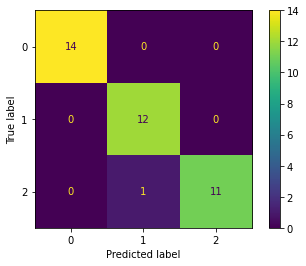

In [18]:
knn = KNeighborsClassifier(n_neighbors =5)
knn.fit(x_train,y_train)
y_predict = knn.predict(x_test)
print("-------Test class------\n",y_test)
print("\n------------Predict Class---------\n",y_predict)
print(knn.predict_proba(x_test))

print(accuracy_score(y_test,y_predict))

#NORMALIZEBOOL,DEFAULT = TRUE

cm = confusion_matrix(y_test,y_predict,normalize=None,labels=knn.classes_)
print(cm)
cm_dis = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels=knn.classes_)
cm_dis.plot()
plt.show()